# Working with the larger data sets.
There's a problem with the memory when trying to load in the larger data tables using my normal method of Table(fit.getdata(...)) So rather than doing that I'll just try to work with the fits file it self rather than loading it into a table. 

Sometimes it would work and if i did the normal Tables.load_tables() for the Binary_Data_Clean.py but the kernal would randomly restart. So that's a problem...

In [3]:
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G, sigma_sb, c

In [13]:
%cd 'DR 14 data'

/home/cody/Binary Search/DR 14 data


In [7]:
ALL_AVERAGE = fits.open('/home/cody/Binary Search/DR 14 data/allStar-l31c.2.fits') #Still takes a while to run
ALL_VISIT = fits.open('/home/cody/Binary Search/DR 14 data/allVisit-l31c.2.fits') 

In [8]:
all_average_data = ALL_AVERAGE[1].data
all_visit_data = ALL_VISIT[1].data

In [9]:
all_visit_data = all_visit_data[np.isfinite(all_visit_data['VHELIO'])]
all_visit_data = all_visit_data[all_visit_data['VHELIO'] < 10**4]

In [22]:
all_average_data_ncut = Table(fits.getdata('/home/cody/Binary Search/DR 14 data/all_average_data_ncut.fits',1))

In [23]:
all_average_data_ncut

APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23]
str45,str34,str46,str38,str18,str8,int16,str16,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,str140,str14,int32,int32,int32,int16,float32,int32,str165,int32,str74,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,float32,float32,float32,str5,str4,str6,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str183,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,int32,str23,str12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str17,float32,float32,int16,int16,float32,float32,str20,str845,str804,int32,int32,float32,float32
apogee.apo25m.s.stars.5046.2M00000662+7528598,5046.2M00000662+7528598,apogee.apo25m.s.l31c.2.5046.2M00000662+7528598,apStar-r8-2M00000662+7528598.fits,2M00000662+7528598,apo25m,5046,120+12,9.435,0.027,9.268,0.03,9.216,0.022,0.027622,75.483292,119.657400797,12.9390122585,0,0,0,"APOGEE2_NO_DERED,APOGEE2_TELLURIC",apogee2,0 .. 6,6,1,0,702.943,131072,SUSPECT_BROAD_LINES,0,,15.6866,0.433717,0.0329418,0.0778042,15.2068,1.27992,0.0313146,0

In [12]:
table_vis = Table(all_visit_data)

In [19]:
%cd '/home/cody/Binary Search'
%run Binary_Data_Clean.py

/home/cody/Binary Search


In [21]:
Tables = Binary_Data_Clean('/home/cody/Binary Search/2nd_Data_Set/allMC.avg.58247.nocut.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

all_average_data works just like the table now. If I want to call a row or column I can do the normal

    all_average_data['APOGEE_ID'][1]

and everything will work like the normal table

In [6]:
#This takes a while to run. Just wait a few minutes and it should all work out. 
all_average_data = all_average_data[all_average_data['NVISITS'] >= 5]

ValueError: max must be larger than min in range parameter.

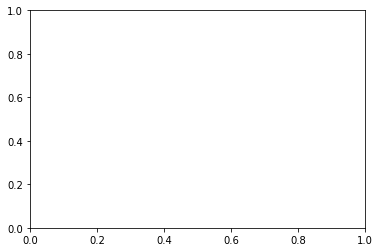

In [9]:
plt.hist(all_average_data['FE_H'])

In [28]:
print(type(all_average_data), type(ALL_AVERAGE[1].data))

2M00000662+7528598
2M00000943+6254542
2M00001045+6126148
2M00001071+6258172
2M00001648+6306232
2M00002036+6153416
2M00002118+6136420
2M00002338+6141442
2M00002388+6151472
2M00002509+7040316
2M00002853+6119307
2M00003503+6120437
2M00003567+6204254
2M00003628+6250352
2M00004407+6151569
2M00004725+7117024
2M00005079+6135289
2M00005196+0022164
2M00005206+0047268
2M00005414+5522241
2M00005591+6305051
2M00005661+0024267
2M00005845+0055046
2M00005934+6105357
2M00010146+6159427
2M00010170+6148575
2M00010201+0101148
2M00010204+0049037
2M00010512+5651581
2M00010582+6302001
2M00010650+0111107
2M00010686+6141041
2M00011291+6121488
2M00011442+0039575
2M00011486+6958352
2M00011552+6156526
2M00011567+6151042
2M00011833+6200410
2M00011871+0011076
2M00011993+6106531
2M00012134+0106579
2M00012190+6224533
2M00012224+0034037
2M00012434+6134249
2M00012439+6252280
2M00012559+0006489
2M00012599+7010526
2M00012667+6217008
2M00012717+0128193
2M00012835+0005101
2M00012854+7021553
2M00013263+0040118
2M00013563+0

2M01595292-0256336
2M02000083-0222226
2M02000419-0309530
2M02000432-0321294
2M02000451-0229333
2M02001017-0307339
2M02001481-0322060
2M02001481-0314404
2M02001915-0319414
2M02002083-0326112
2M02002356-0303574
2M02002588-0248517
2M02002876+6127482
2M02003092-0319005
2M02003668-0303403
2M02004097-0306371
2M02004163-0312407
2M02004815-0251045
2M02005395+6025180
2M02010950+6055594
2M02013054+6214269
2M02014627+6145097
2M02014947+6251037
2M02020087+6253269
2M02024072+6217387
2M02024134+6248370
2M02024810+6032487
2M02025696+6212355
2M02025781+6145411
2M02025886+6218412
2M02030138+6103545
2M02030939+6215017
2M02031194+6042143
2M02031996+6215170
2M02045629+6249289
2M02051021+6218232
2M02052668+6213178
2M02052916+6147130
2M02053040+6215253
2M02054088+6215458
2M02055124+6215396
2M02063211+6056171
2M02065327+6251020
2M02071097+6245149
2M02081498+6248521
2M02084669+6240520
2M02123870+4942289
2M02233822+4725364
2M02252994+4759115
2M02265971+4649181
2M02270722+4834477
2M02271073+4717561
2M02273460+4

2M04081098+5322335
2M04081216-0503288
2M04081351-0633542
2M04081437-0556428
2M04081602-0512110
2M04081814+5127550
2M04081885+6924265
2M04082280+5303322
2M04082291-0606068
2M04082636-0524004
2M04082660-0542338
2M04082759-0640547
2M04083311-0513176
2M04083495-0531582
2M04083762+7957565
2M04084218-0632474
2M04084296-0556383
2M04084362-0449302
2M04084411+5155317
2M04084473+5201179
2M04084721-0511177
2M04084767-0439210
2M04084800+6652225
2M04084944+7945504
2M04085132-0613473
2M04085142-0644423
2M04085152-0617381
2M04085187-0616122
2M04085377+5134500
2M04085465-0542006
2M04085798-0640551
2M04085894-0415307
2M04085924-0519398
2M04085958+7948251
2M04090024-0617545
2M04090104-0525340
2M04090109-0507269
2M04090225+5136339
2M04090253+5320396
2M04090472-0508586
2M04090611-0650049
2M04090629-0419591
2M04091140-0521247
2M04091212-0617337
2M04091342-0445098
2M04091354-0415468
2M04091374-0638343
2M04091507-0457374
2M04091749+5232209
2M04091772+5321549
2M04091799-0648195
2M04091834-0621284
2M04091940-0

2M05272999+3447116
2M05273334+2724261
2M05273499+3350310
2M05273776+4424015
2M05274071+2637292
2M05274195+2735464
2M05274200+4303207
2M05274299+4436282
2M05274323+3348323
2M05274402+2727228
2M05274567+2747367
2M05274598+4428045
2M05274614+2700227
2M05274903+3522492
2M05274970+2733543
2M05275100+2731138
2M05275179+3353422
2M05275235+1227035
2M05275288+2648116
2M05275500+1412129
2M05275721+2729216
2M05275762+2639487
2M05275821+4258030
2M05275911+1254422
2M05280130+2702303
2M05280226+2658332
2M05280325+4322124
2M05280378+2529122
2M05280546+2707010
2M05280944+2613305
2M05281064+2809549
2M05281251+1337224
2M05281267+4302028
2M05281361+3521331
2M05281463+4331203
2M05281603+1215076
2M05281616+1332455
2M05282039+4338375
2M05282050+2706286
2M05282057+3350526
2M05282225+2722558
2M05282359+2749597
2M05282447+4314268
2M05282730+2541358
2M05282830+2737513
2M05282880+2708437
2M05283386+1201462
2M05283450+2625471
2M05283498+2609108
2M05283548+3404139
2M05283680+4413282
2M05283755+2759008
2M05283937+2

2M06304958+0038473
2M06305008+0034263
2M06305051-0001161
2M06305202+0539433
2M06305243+0438596
2M06305280+0549133
2M06305562+0018539
2M06305599-0002286
2M06305804+1625574
2M06305992+0602023
2M06310004+1718364
2M06310105+0211421
2M06310160+0532240
2M06310182+1753412
2M06310195+0502155
2M06310226+0141357
2M06310351+1802149
2M06310587+1719520
2M06310594+0045131
2M06310648+1649309
2M06310652+1742565
2M06310775+0623263
2M06310822+0639289
2M06310948-0018039
2M06311051+1755343
2M06311091+0135500
2M06311095+1631365
2M06311208+1715576
2M06311306+0637142
2M06311417+0203464
2M06311446+1847318
2M06311466+0051046
2M06311476+0128073
2M06311522+1637567
2M06311554+0521410
2M06311683+0437259
2M06311742+1710159
2M06311776+0414475
2M06311994+1659066
2M06311994-0033397
2M06312010+1652142
2M06312079+0501123
2M06312184+1732039
2M06312219+0107231
2M06312373+0036445
2M06312469+0619326
2M06312809+3420076
2M06312818-0018248
2M06312847+0624249
2M06312909+0433056
2M06312962+0056385
2M06313106+1805536
2M06313124+0

2M07352715+2231449
2M07352748+1658105
2M07352866+2029423
2M07353143+1619484
2M07353233+1555506
2M07353240+3605312
2M07353310+1647380
2M07353312+2057194
2M07353319+3644508
2M07353444+2156207
2M07353470+3653245
2M07353486+2130110
2M07353621+1646403
2M07353721+1708290
2M07353833+1808316
2M07353857+1745192
2M07353896+2251471
2M07354445+2109537
2M07354458+3625363
2M07354644+2242512
2M07354686+2206514
2M07354717+1749314
2M07354851+1718160
2M07354910+3709431
2M07355028+3805584
2M07355031+1620096
2M07355201+2131192
2M07355296+2135482
2M07355361+1649151
2M07355376+1708560
2M07355437+3705296
2M07355509+2233525
2M07355579+1705413
2M07355580+3616283
2M07355627+1643023
2M07355793+1556351
2M07355925+2125106
2M07360057+3733067
2M07360197+2240378
2M07360278+2059288
2M07360320+2251550
2M07360321+2230161
2M07360373+1825245
2M07360560+1613129
2M07360735+1602149
2M07360910+2134250
2M07360910+2211383
2M07361058+1607459
2M07361174+1815274
2M07361346+2015152
2M07361352+3649131
2M07361411+3623171
2M07361446+3

2M09385069+4544057
2M09385304+5417022
2M09385667+4534465
2M09385726+4515571
2M09385810+5643457
2M09385959+5517405
2M09390045+5631091
2M09390559+4524487
2M09390583+5422492
2M09390660+4548442
2M09390667+4559182
2M09391027+5413262
2M09391165+5640465
2M09391206+4552261
2M09391264+5503427
2M09391273+5410284
2M09391414+5538186
2M09391635+4527552
2M09392010+5623103
2M09392302+5640593
2M09392465+4553086
2M09392603+4541478
2M09392779+5418549
2M09393603+4542081
2M09393948+5621472
2M09393989+4458299
2M09394086+4604300
2M09395145+4611565
2M09400672+5638228
2M09400674+4605203
2M09400829+4532230
2M09401252+4508500
2M09401581+5621539
2M09401790+4622450
2M09402869+4448208
2M09403697+5500051
2M09403775+5440111
2M09403872+4519147
2M09403914+5415144
2M09404160+5430278
2M09404222+4445206
2M09404485+5618589
2M09404752+5546523
2M09404965+5557325
2M09405244+4526016
2M09405273+5641041
2M09405293+5624071
2M09405309+5609097
2M09405329+5454180
2M09405735+5608070
2M09405927+4615341
2M09410120+4441247
2M09410139+5

2M11494824+0234194
2M11494850+1935102
2M11494868+0134379
2M11494998+0027242
2M11495052+1958165
2M11495145+1940369
2M11495304+0019269
2M11495332+0113507
2M11495335+0046188
2M11495534+0129216
2M11495577+0050189
2M11495680+0055158
2M11495718+0013019
2M11495782+0107460
2M11495914+3532550
2M11495948-0030326
2M11500008+0133504
2M11500014+0046422
2M11500045+2015357
2M11500124+0113436
2M11500180+3304239
2M11500305+1947075
2M11500421+0037411
2M11500512+0136190
2M11500513+0058167
2M11500535+0046305
2M11500570+1951465
2M11500616+0028370
2M11500639+0014271
2M11500690+3401514
2M11500699+1845065
2M11500736+1930153
2M11500810+0122064
2M11500852+3354069
2M11500881+3438186
2M11500912+0134540
2M11500935+1935267
2M11500960+0140520
2M11501000+0109183
2M11501000+0109183
2M11501202+3341137
2M11501206+0058467
2M11501239+1846241
2M11501252+2038042
2M11501272-0007254
2M11501293+1910253
2M11501460+1918433
2M11501586+0124395
2M11501708+3342292
2M11501734+3328595
2M11501773+0124416
2M11501774+0108339
2M11501795+3

2M12521210+2734118
2M12521302+2621420
2M12521329+4155359
2M12521409+4209062
2M12521442+2755088
2M12521459+1153301
2M12521528+4051018
2M12521613+1228127
2M12521637+2658080
2M12521646+4134082
2M12521772+1215020
2M12521852+1143531
2M12521924+1256104
2M12521938+1129328
2M12521959+2629261
2M12521985+4200425
2M12522001+4239346
2M12522033+4224346
2M12522109+1238511
2M12522236+4137260
2M12522242+1301345
2M12522258+4143094
2M12522490+4311262
2M12522714+4247292
2M12522755+1119376
2M12523056+1301166
2M12523070+4155517
2M12523095+2744130
2M12523191+1136122
2M12523231+1204520
2M12523295+2638075
2M12523342+2552092
2M12523555+4241437
2M12523586+2634462
2M12523644+2541492
2M12523647+1247438
2M12523725+1105432
2M12523816+1240586
2M12523829+1118295
2M12523900+4230113
2M12524120+4138173
2M12524137+4054284
2M12524142+4311435
2M12524173+1259101
2M12524179+2616376
2M12524242+1245206
2M12524258+2757142
2M12524263+1125558
2M12524510+1252279
2M12524522+2603088
2M12524565+2814353
2M12524635+2802184
2M12524726+2

2M14472742-0612322
2M14473262-0728344
2M14473971-0755041
2M14474060-0720285
2M14474212-0759390
2M14474223-0605047
2M14474237-0622342
2M14474383-0609513
2M14474434-0736279
2M14474900-0643178
2M14474954-0709165
2M14475244-0658242
2M14475400-0544305
2M14475834-0638422
2M14475876-0757202
2M14480122-0704020
2M14480159-0707430
2M14480263-0700304
2M14480414-0644198
2M14480504-0626308
2M14480739-0618280
2M14481096-0810453
2M14481135-0626014
2M14481280-0714348
2M14481587-0742550
2M14481837-0559144
2M14482024-0601567
2M14482114-0805597
2M14482608-0617086
2M14482670-0542547
2M14482685-0612563
2M14483016-0655336
2M14483118-0653044
2M14483384-0747154
2M14483777-0603298
2M14484064-0706253
2M14484087-0623384
2M14484139-0547313
2M14484317-0824530
2M14484376-0708341
2M14484546-0556217
2M14484578-0806473
2M14485294-0643215
2M14490104-0654526
2M14490311-0807364
2M14490569-0604024
2M14490585-0545056
2M14491534-0731297
2M14491618-0734010
2M14491704-0822288
2M14491750-0540013
2M14492120-0624019
2M14492194-0

2M16162767+2331364
2M16162769+2316562
2M16162849+2313107
2M16162878+5058321
2M16162886+5007225
2M16163017+2309193
2M16163164+5034417
2M16163245+5020580
2M16163289+3143204
2M16163352+2313468
2M16163374+3117246
2M16163554+5051374
2M16163648+5015132
2M16163857+3119561
2M16163902+3103138
2M16163940+2330588
2M16164044+3232383
2M16164119+2407271
2M16164258+5136417
2M16164275+2348036
2M16164364+2340390
2M16164364+2340390
2M16164395+3133207
2M16164461+2321239
2M16164468+5214485
2M16164473+3100236
2M16164507+3235373
2M16164587+2253244
2M16164736+5101186
2M16164738+5133344
2M16164813+5211574
2M16164889+5245114
2M16164908+5233296
2M16164931+5048238
2M16165000+5155588
2M16165098+2403538
2M16165342+5109051
2M16165433+3107214
2M16165579+5130237
2M16165594+3213020
2M16165595+5014150
2M16165818+5216007
2M16165970+2354464
2M16170327+2339298
2M16170422+5054340
2M16170626+2401086
2M16170681+3159433
2M16170685+2257188
2M16170843+2339058
2M16170878+2337561
2M16170879+5241497
2M16170977+2401346
2M16171021+5

2M17205522+5824508
2M17205539+3207477
2M17205626+3206324
2M17205754+5932212
2M17205848+5641384
2M17205852+3115209
2M17205900+5930047
2M17205976+6005212
2M17210223+5815384
2M17210351+5642406
2M17210352+5757082
2M17210484+5802011
2M17210579+3233277
2M17210799+5720370
2M17210811+5906289
2M17211190+4311561
2M17211195+3222193
2M17211264+5951146
2M17211408+4359247
2M17211447+5808376
2M17211457+5752139
2M17211475+5851583
2M17211662+5838461
2M17211685+4210251
2M17211764+4218252
2M17211766+3229207
2M17211865+3116161
2M17211994+3119470
2M17212080+6003296
2M17212098+4224196
2M17212367+3159144
2M17212544+4259575
2M17212581+5841185
2M17212596+3135149
2M17212624+5752066
2M17212693+3233092
2M17212765+5951208
2M17212860+3209558
2M17212861+3205047
2M17212921+5718269
2M17213025+5750163
2M17213193+4210223
2M17213209+5806425
2M17213327+3149399
2M17213456+4247129
2M17213669+4404593
2M17213683+5729491
2M17214034+5747320
2M17214034+3147556
2M17214063+5922266
2M17214096+4246147
2M17214197+6000431
2M17214235+3

2M18524656+0118425
2M18524810-0721533
2M18525076-0007021
2M18525101+0110546
2M18525299-0002285
2M18525325+4839242
2M18525428-0810178
2M18525444+4541518
2M18525593+0011120
2M18525850+0014319
2M18525859+4536436
2M18525864-0031500
2M18525986-0007094
2M18530104+4518135
2M18530207+0023313
2M18530327+0044344
2M18530458+0041592
2M18530526-0006199
2M18530660-0751148
2M18530663+0224375
2M18530678+0150535
2M18530685-0610048
2M18530689-0029123
2M18530767-0553367
2M18530891-3043498
2M18531128-0704186
2M18531166-0001338
2M18531207-3042410
2M18531282+0024442
2M18531302-0024450
2M18531337-0813162
2M18531410-0545407
2M18531505-0018064
2M18531548-0007457
2M18531644-0009178
2M18531761-0618307
2M18531947-0013219
2M18532078-0556523
2M18532079+0143193
2M18532116+0000425
2M18532131-0544564
2M18532301+4644089
2M18532603+0016350
2M18532610-0617174
2M18532700+4645082
2M18532708-0545237
2M18532733-0635552
2M18532760+4732179
2M18532794+0052130
2M18532927+0135048
2M18533091-0627061
2M18533097-3020385
2M18533121-0

2M19270156+0035230
2M19270222+4217040
2M19270249+4156386
2M19270253+4255261
2M19270274+4204494
2M19270430+0120124
2M19270488+4143598
2M19270498-0034524
2M19270523+4105530
2M19270621+1402357
2M19270627+2436457
2M19270665+0003243
2M19270682+1356500
2M19270690-0005402
2M19270761+1358099
2M19270851+2448195
2M19270855-0009249
2M19270889+3851473
2M19270900+4228103
2M19271030+0124366
2M19271080-0036095
2M19271221+1358459
2M19271287-0011462
2M19271392+3837217
2M19271448+0016399
2M19271512+3805174
2M19271600-0002255
2M19271627+3919329
2M19271665+3741015
2M19271676+1420002
2M19271763+4230583
2M19271787+3900222
2M19271792+3846476
2M19271845+4142356
2M19271892+0106388
2M19271918+0024236
2M19271999+0153531
2M19272023+3918264
2M19272262+2637244
2M19272308+2659499
2M19272329+0045189
2M19272341+3908368
2M19272392+3744190
2M19272415-0030592
2M19272432+2619292
2M19272440+4213453
2M19272446+3719265
2M19272524+3823352
2M19272539+2455174
2M19272645+0149095
2M19272700+0130004
2M19272794+1414299
2M19272931+4

2M20391035+5326588
2M20391090+0043324
2M20391224+2205320
2M20391271+2053544
2M20391298+4025059
2M20391545+2200058
2M20391887+1955402
2M20391896+5416572
2M20391914+0023120
2M20392220+0013083
2M20392371+4008050
2M20392404+2136136
2M20392525+0011003
2M20392709+0030091
2M20393110+2011240
2M20393156-0052270
2M20393205+3913415
2M20393336+2113588
2M20393360+5413183
2M20393575+5229069
2M20393867-0102223
2M20394313+0014201
2M20394331-0056258
2M20394375+2027080
2M20394538-0048251
2M20394622+0038299
2M20394785-0104562
2M20394823-0026564
2M20394871-0000051
2M20395068+2048470
2M20395496+1946288
2M20395548+2159447
2M20395571+4008118
2M20395594+2048058
2M20395787-0006116
2M20400011+2022539
2M20400111-0056452
2M20400176+3952396
2M20400280+0118209
2M20400380+0037405
2M20400726+2143314
2M20400776+0007390
2M20400797+5308347
2M20400984-0002332
2M20401073+2048407
2M20401097-0036352
2M20401109+5336215
2M20401156+5343381
2M20401166-0055347
2M20401208-0102173
2M20401257+0013446
2M20401290+0018225
2M20401320+5

2M23441276+6302481
2M23441481+8519281
2M23441694+6248326
2M23441911+6108096
2M23442230+6232325
2M23442691+6313466
2M23442825+6246357
2M23442827+6058327
2M23442977+6305003
2M23443136+6231347
2M23444164+6157023
2M23444179+6124498
2M23444247+6318311
2M23444458+6140528
2M23444461+6307473
2M23444481+6102524
2M23444498+6253484
2M23444549+6311003
2M23450204+6158089
2M23450387+5630300
2M23450830+5626491
2M23450866+6320358
2M23452314+6126140
2M23452479+5722207
2M23452752+6108534
2M23453222+6209242
2M23453529+6219540
2M23453531+6259290
2M23453585+6241478
2M23454085+6214576
2M23454614+6150140
2M23454724+6122330
2M23454774+6318468
2M23455689+6234281
2M23455932+6247280
2M23460042+6159277
2M23460063+6240117
2M23460131+6121236
2M23460144+6319010
2M23461232+6210147
2M23461548+6223220
2M23462189+6114096
2M23462642+6230248
2M23463425+6316047
2M23463580+6103320
2M23463614+6220152
2M23463740+6207092
2M23464379+6118240
2M23464413+6306192
2M23464852+6119538
2M23465338+6052189
2M23465445+6100433
2M23465958+6

In [ ]:
AllAvg

In [24]:
AAS_RG = Tables.rg_cut(all_average_data_ncut)

/home/cody/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [26]:
ISO = Table(fits.getdata('/home/cody/Binary Search/parsec_decamsdss_all.fits.gz',1))

In [27]:
AAS_RG_ISO = Tables.iso_fit(AAS_RG, ISO)


In [29]:
AAS_RG_ISO.write('all_average_mw_simp_iso.fits', format = 'fits')

In [ ]:
AAS_RG_ISO_5, AllVisSimp5 = Tables.nvisits_cut(AAS_RG_ISO,AllVis,5)